<a href="https://colab.research.google.com/github/Souleiman11/ChatNow/blob/main/Copie_de_clustring_tf_idf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-learn

In [ ]:
import pandas as pd
from io import StringIO
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Path to your JSON file
json_file = 'mangas+desc.json'

# **Read JSON file and load into DataFrame**
df = pd.read_json(json_file, orient='records')

# **Display the DataFrame**
print(df)

                                            manga_name  rating  \
0    \n\t\t\t\t\t\tWhen The Black Wolf Calls Me    ...     4.3   
1    \n\t\t\t\t\t\tThe Mighty Extra: One Girl Chang...     4.2   
2      \n\t\t\t\t\t\tConfined Room                         0.0   
3    \n\t\t\t\t\t\tHow to Live as a Tyrant’s Spoile...     5.0   
4    \n\t\t\t\t\t\tForget My Husband, I’ll Go Make ...     4.3   
..                                                 ...     ...   
189  \n\t\t\t\t\t\tIf a Mad Dog Bites a Cub        ...     4.0   
190  \n\t\t\t\t\t\tThe Book of Lasier              ...     4.2   
191  \n\t\t\t\t\t\tThe Villainous Family Is Against...     4.3   
192  \n\t\t\t\t\t\tMy Sister’s Private Life        ...     3.9   
193            \n\t\t\t\t\t\tLucia                         4.0   

                                                 story  
0    [لا يمكنك أن تجعلني ملكك. “الشخص الذي يمكنه قت...  
1    [من السهل التغاضي عن الإضافات في الرواية، ولكن...  
2    [إنها فتاة شفافة محبوسة في الغر

In [ ]:
df.describe()

,rating
count,193.000000
mean,3.997409
std,1.160973
min,0.000000
25%,4.000000
50%,4.200000
75%,4.500000
max,5.000000


In [ ]:
# Step 1: Clean the 'manga_name' and 'stat' columns (remove newlines, tabs, and strip spaces)
df["manga_name"] = df["manga_name"].astype(str).str.replace(r"[\n\t]+", "", regex=True).str.strip()
df["stat"] = df["stat"].astype(str).str.replace(r"[\n\t]+", "", regex=True).str.strip()

# Step 2: Drop rows where 'manga_name' is empty or NaN
df = df[df["manga_name"] != ""]

# Step 3: Convert 'rating' to numeric and remove NaN values
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

# Step 4: Remove rows where rating is 0.0 and category list is empty
df = df[~((df["rating"] == 0.0) & (df["cathegory"].apply(lambda x: len(x) == 0)))]

# Step 5: Fill missing values in 'stat' with 'Unknown'
df["stat"] = df["stat"].replace("nan", "Unknown")
df["stat"] = df["stat"].replace("None", "Unknown")
df = df.dropna(subset=["manga_name"])
df = df.dropna(subset=["rating"])
# Reset index after cleaning
df.reset_index(drop=True, inplace=True)

# Display cleaned DataFrame
print(df)

                                         manga_name  rating    cathegory  \
0                   There Is No Need To Be Obsessed     5.0    ['دراما']   
1                                           Eleceed     4.4     ['اكشن']   
2              First, Let’s Hide My Younger Brother     4.1    ['اثاره']   
3                         Anyone Beats The Original     4.0    ['دراما']   
4                       Expelled Hero Is Too Strong     4.9    ['اثاره']   
..                                              ...     ...          ...   
688          Born As The Daughter of the Villainess     4.3           []   
689                 Into The Bones of Warm Marriage     3.8    ['جوسيه']   
690         The Duke of Cold Blood’s Plan of Attack     4.2   ['تاريخى']   
691  Witch’s Judgment Is to Be Turned Into a Flower     4.0    ['اثاره']   
692                                Kiss Me, Love Me     3.0  ['رومانسى']   

        stat  
0    OnGoing  
1    OnGoing  
2    OnGoing  
3    OnGoing  
4    OnGoing

In [ ]:
# Step 1: Clean the 'manga_name' and 'stat' columns (remove newlines, tabs, and strip spaces)
df["manga_name"] = df["manga_name"].astype(str).str.replace(r"[\n\t]+", "", regex=True).str.strip()


# Step 2: Drop rows where 'manga_name' is empty or NaN
df = df[df["manga_name"] != ""]

# Step 3: Convert 'rating' to numeric and remove NaN values
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")



# Step 5: Fill missing values in 'stat' with 'Unknown'

df = df.dropna(subset=["manga_name"])

# Reset index after cleaning
df.reset_index(drop=True, inplace=True)
df = df.dropna(subset=["rating"])
# Display cleaned DataFrame
print(df)

                                        manga_name  rating  \
0                     When The Black Wolf Calls Me     4.3   
1     The Mighty Extra: One Girl Changes the World     4.2   
2                                    Confined Room     0.0   
3           How to Live as a Tyrant’s Spoiled Brat     5.0   
4            Forget My Husband, I’ll Go Make Money     4.3   
..                                             ...     ...   
189                       If a Mad Dog Bites a Cub     4.0   
190                             The Book of Lasier     4.2   
191  The Villainous Family Is Against Independence     4.3   
192                       My Sister’s Private Life     3.9   
193                                          Lucia     4.0   

                                                 story  
0    [لا يمكنك أن تجعلني ملكك. “الشخص الذي يمكنه قت...  
1    [من السهل التغاضي عن الإضافات في الرواية، ولكن...  
2    [إنها فتاة شفافة محبوسة في الغرفة السرية! من ه...  
3    [المانهوا ليست شوجو نه

In [ ]:
# Display the DataFrame
display(df)

,manga_name,rating,story
0,When The Black Wolf Calls Me,4.3,[لا يمكنك أن تجعلني ملكك. “الشخص الذي يمكنه قت...
1,The Mighty Extra: One Girl Changes the World,4.2,[من السهل التغاضي عن الإضافات في الرواية، ولكن...
2,Confined Room,0.0,[إنها فتاة شفافة محبوسة في الغرفة السرية! من ه...
3,How to Live as a Tyrant’s Spoiled Brat,5.0,[المانهوا ليست شوجو نهائي 🗿ندخل في القصة في ال...
4,"Forget My Husband, I’ll Go Make Money",4.3,[في الواقع، كانت تملك <رؤيـة الملك> ، والتي يم...
...,...,...,...
189,If a Mad Dog Bites a Cub,4.0,[[أدريان الفارسة التي تُلقب بـ “الكلب المجنون”...
190,The Book of Lasier,4.2,[]
191,The Villainous Family Is Against Independence,4.3,[إيلودي، الابنة غير الشرعية لعائلة من الأشرار ...
192,My Sister’s Private Life,3.9,[تتغير حياة امرأة غامضة فجأة بسبب حادث يسبب له...


#TF-IDF

In [ ]:
# Step 1: Instantiate an object of the class TfidfVectorizer with max_df and min_df parameters
vectorizer = TfidfVectorizer(max_df=0.5, min_df=1)  # min_df=1 instead of 5 since we only have 5 documents total

# Step 2: Create the tf-idf matrix using the method fit_transform() on the story column
df["story"] = df["story"].astype(str)  # Convert lists to strings
tfidf_matrix = vectorizer.fit_transform(df["story"])
# Step 3: Print the list of terms included in the tf-idf matrix
feature_names = vectorizer.get_feature_names_out()
print("Terms included in the TF-IDF matrix:")
print(feature_names)
print("\nNumber of terms:", len(feature_names))

# Step 4: Display the size of the matrix
print("\nSize of the TF-IDF matrix:", tfidf_matrix.shape)

Terms included in the TF-IDF matrix:
['10' '100' '13' ... 'يوهان' 'يي' 'ييجون']

Number of terms: 4888

Size of the TF-IDF matrix: (193, 4888)


In [ ]:
# Step 1: Instantiate an object of the class TfidfVectorizer with max_df and min_df parameters
vectorizer = TfidfVectorizer(max_df=0.5, min_df=1)  # min_df=1 instead of 5 since we only have 5 documents total

# Step 2: Create the tf-idf matrix using the method fit_transform() on the story column
df["manga_name"] = df["manga_name"].astype(str)  # Convert lists to strings
tfidf_matrix = vectorizer.fit_transform(df["manga_name"])
# Step 3: Print the list of terms included in the tf-idf matrix
feature_names = vectorizer.get_feature_names_out()
print("Terms included in the TF-IDF matrix:")
print(feature_names)
print("\nNumber of terms:", len(feature_names))

# Step 4: Display the size of the matrix
print("\nSize of the TF-IDF matrix:", tfidf_matrix.shape)

Terms included in the TF-IDF matrix:
['100' 'about' 'academy' 'accidentally' 'admission' 'adopted' 'against'
 'age' 'akatsuki' 'alive' 'all' 'alone' 'alya' 'am' 'among' 'amusement'
 'an' 'and' 'angel' 'annihilate' 'another' 'ao' 'apocalyptic' 'are'
 'around' 'arrogance' 'arts' 'as' 'assassin' 'at' 'awakened' 'awakening'
 'bad' 'badboy' 'baki' 'ball' 'battle' 'be' 'beast' 'beautiful' 'became'
 'because' 'becoming' 'been' 'beginning' 'begins' 'behind' 'being'
 'beloved' 'benevolence' 'best' 'better' 'billion' 'billionaire' 'bites'
 'black' 'blade' 'blades' 'blood' 'book' 'bouken' 'boyfriend' 'brat'
 'bride' 'broken' 'but' 'by' 'calls' 'can' 'car' 'cat' 'catch' 'ceo'
 'chaebol' 'chan' 'changes' 'chef' 'child' 'childhood' 'children' 'city'
 'civil' 'civilization' 'class' 'club' 'comic' 'competent' 'confined'
 'conglomerate' 'contract' 'cop' 'corps' 'count' 'couple' 'covenant'
 'crazy' 'crime' 'crown' 'cub' 'cultivation' 'cute' 'cutie' 'dad' 'daddy'
 'darkness' 'darling' 'daughter' 'days' '

#K-MEANS

In [ ]:
names = vectorizer.fit_transform(df["manga_name"])
story = vectorizer.fit_transform(df["story"])

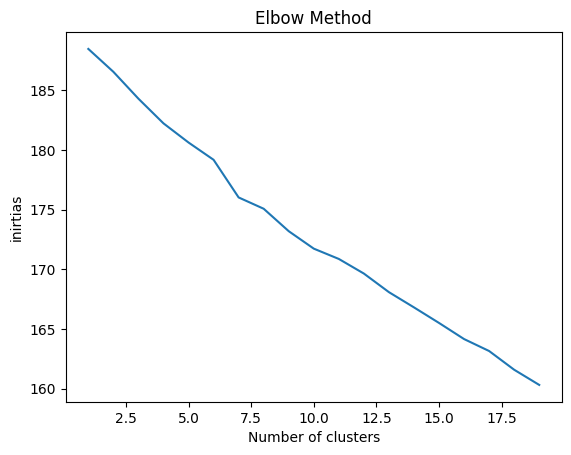

In [ ]:
ilist=[]
n=20
for i in range(1, n):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(names,story)
    ilist.append(kmeans.inertia_)
plt.plot(range(1, n), ilist)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inirtias')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=0)
y_kmeans =kmeans.fit_predict(names,story)

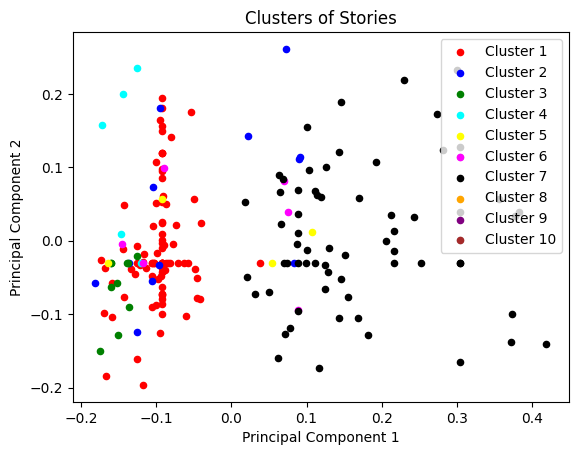

In [ ]:
# Import matplotlib if not already imported
import matplotlib.pyplot as plt
import numpy as np

# Assuming data is high-dimensional, use PCA to reduce to 2D for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
names2d = pca.fit_transform(names)
story2d = pca.fit_transform(story)

# Create the scatter plot with the 2D data
plt.scatter(names2d[y_kmeans == 0, 0], story2d[y_kmeans == 0, 1], s=20, c='red', label='Cluster 1')
plt.scatter(names2d[y_kmeans == 1, 0], story2d[y_kmeans == 1, 1], s=20, c='blue', label='Cluster 2')
plt.scatter(names2d[y_kmeans == 2, 0], story2d[y_kmeans == 2, 1], s=20, c='green', label='Cluster 3')
plt.scatter(names2d[y_kmeans == 3, 0], story2d[y_kmeans == 3, 1], s=20, c='cyan', label='Cluster 4')
plt.scatter(names2d[y_kmeans == 4, 0], story2d[y_kmeans == 4, 1], s=20, c='yellow', label='Cluster 5')
plt.scatter(names2d[y_kmeans == 5, 0], story2d[y_kmeans == 5, 1], s=20, c='magenta', label='Cluster 6')
plt.scatter(names2d[y_kmeans == 6, 0], story2d[y_kmeans == 6, 1], s=20, c='black', label='Cluster 7')
plt.scatter(names2d[y_kmeans == 7, 0], story2d[y_kmeans == 7, 1], s=20, c='orange', label='Cluster 8')
plt.scatter(names2d[y_kmeans == 8, 0], story2d[y_kmeans == 8, 1], s=20, c='purple', label='Cluster 9')
plt.scatter(names2d[y_kmeans == 9, 0], story2d[y_kmeans == 9, 1], s=20, c='brown', label='Cluster 10')

plt.title('Clusters of Stories')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()